# Question 1: Reading the Banking CSV and getting the 5-Number Summary

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Reading the CSV file
bank_data = pd.read_csv('bank_data.csv')
bank_data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [5]:
#Looking at the summary of the all the numerical data
bank_data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [12]:
#Categorical variable summary
bank_data.iloc[:,4:].describe(include ="all")

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,600,600,600,600,600,600,600
unique,2,4,2,2,2,2,2,2
top,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,300,269,396,304,414,455,391,326


In [23]:
#Bar charts of the Categorical Variables
b2 = bank_data.iloc[:,4:]
b2.columns


Index(['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct',
       'mortgage', 'pep'],
      dtype='object')

Text(0.5, 1.0, 'Category Distribution')

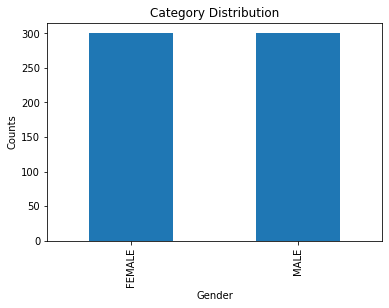

In [27]:
#Gender distribution
b2['gender'].value_counts().plot(kind = "bar")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Category Distribution')

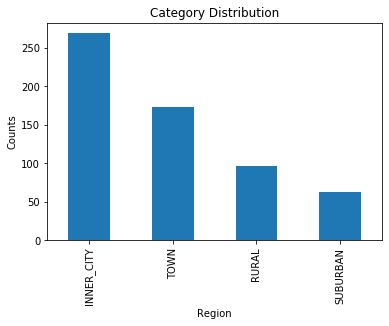

In [28]:
b2['region'].value_counts().plot(kind = "bar")
plt.xlabel("Region")
plt.ylabel("Counts")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Category Distribution')

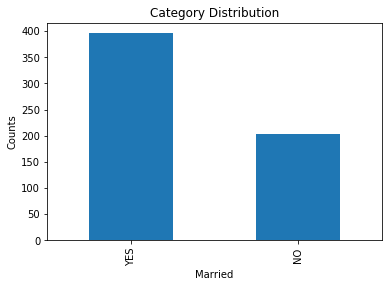

In [29]:
b2['married'].value_counts().plot(kind = "bar")
plt.xlabel("Married")
plt.ylabel("Counts")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Category Distribution')

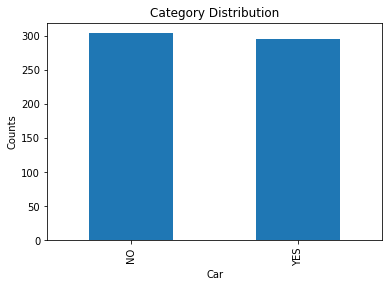

In [30]:
b2['car'].value_counts().plot(kind = "bar")
plt.xlabel("Car")
plt.ylabel("Counts")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Category Distribution')

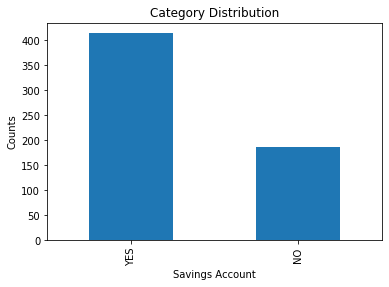

In [31]:
b2['savings_acct'].value_counts().plot(kind = "bar")
plt.xlabel("Savings Account")
plt.ylabel("Counts")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Category Distribution')

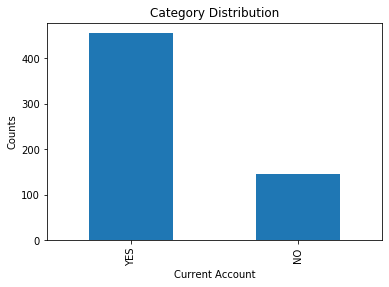

In [32]:
b2['current_acct'].value_counts().plot(kind = "bar")
plt.xlabel("Current Account")
plt.ylabel("Counts")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Category Distribution')

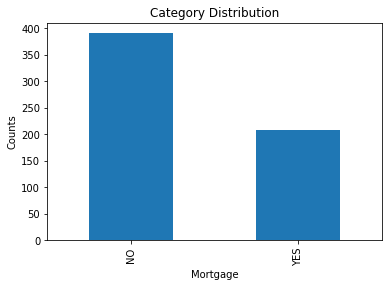

In [33]:
b2['mortgage'].value_counts().plot(kind = "bar")
plt.xlabel("Mortgage")
plt.ylabel("Counts")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Category Distribution')

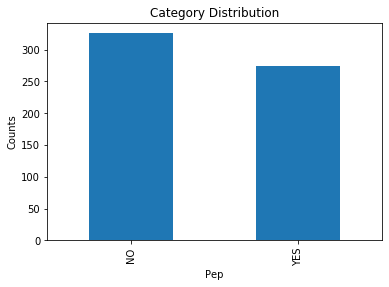

In [34]:
b2['pep'].value_counts().plot(kind = "bar")
plt.xlabel("Pep")
plt.ylabel("Counts")
plt.title("Category Distribution")

# Question 2: Analyzing Personal Equity Plan Attribute

In [35]:
#Plotting the PEP column against the others in the dataset

bank_data.groupby("pep").describe().T

pep                       NO           YES
age      count    326.000000    274.000000
         mean      40.098160     45.127737
         std       14.123506     14.327991
         min       18.000000     18.000000
         25%       27.000000     34.000000
         50%       40.000000     45.000000
         75%       51.000000     58.000000
         max       67.000000     67.000000
income   count    326.000000    274.000000
         mean   24900.953374  30644.919453
         std    11661.123422  13609.613043
         min     5014.210000   7756.360000
         25%    15366.475000  19639.475000
         50%    23105.000000  28080.050000
         75%    31210.900000  38458.350000
         max    61554.600000  63130.100000
children count    326.000000    274.000000
         mean       1.067485      0.945255
         std        1.195524      0.860571
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        0.000000      1.000000
         75%        2.000000      1.000000
         max        3.000000      3.000000

The individuals that signed up for the Personal Equity Plans seem to be, on average, older and have slightly more income. Additionally, they also have less children than individuals who do not subscribe for PEPs.

# Question 3: Z-Score Normalization

In [37]:
bank_data['inc_zscore'] = (bank_data["income"] - bank_data["income"].mean()) / bank_data["income"].std()
bank_data['income'].describe()

count      600.000000
mean     27524.031217
std      12899.468246
min       5014.210000
25%      17264.500000
50%      24925.300000
75%      36172.675000
max      63130.100000
Name: income, dtype: float64

In [38]:
bank_data['inc_zscore'].describe()

count    6.000000e+02
mean    -2.513545e-15
std      1.000000e+00
min     -1.745019e+00
25%     -7.953453e-01
50%     -2.014603e-01
75%      6.704651e-01
max      2.760274e+00
Name: inc_zscore, dtype: float64

# Question 4: Discretization

In [41]:
bank_data['age_dis'] = pd.qcut(bank_data.age, [0, .33, .66, 1], labels=["young", "mid-age", "old"])
bank_data['age_dis'].head()

0    mid-age
1    mid-age
2        old
3      young
4        old
Name: age_dis, dtype: category
Categories (3, object): [young < mid-age < old]

# Question 5: Min-Max Normalization

In [59]:
#Getting Dummy Variables
b3 = bank_data.drop(columns = ['id'])
b3 = pd.get_dummies(b3)
b3.head()

,age,income,children,inc_zscore,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,age_dis_young,age_dis_mid-age,age_dis_old
0,48,17546.0,1,-0.773523,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,40,30085.1,3,0.198541,0,1,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
2,51,16575.4,0,-0.848766,1,0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1
3,23,20375.4,3,-0.554180,1,0,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
4,57,50576.3,0,1.787071,1,0,0,1,0,0,...,1,1,0,1,0,1,0,0,0,1


In [65]:
#Min-max normalization
b3_norm = (b3 - b3.min()) / (b3.max()- b3.min())
b3_norm.describe()

,age,income,children,inc_zscore,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,age_dis_young,age_dis_mid-age,age_dis_old
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.497857,0.387326,0.337222,0.387326,0.500000,0.500000,0.448333,0.160000,0.103333,0.288333,...,0.690000,0.241667,0.758333,0.651667,0.348333,0.543333,0.456667,0.348333,0.321667,0.330000
std,0.294387,0.221961,0.352251,0.221961,0.500417,0.500417,0.497738,0.366912,0.304648,0.453365,...,0.462879,0.428451,0.428451,0.476840,0.476840,0.498534,0.498534,0.476840,0.467506,0.470605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244898,0.210791,0.000000,0.210791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.489796,0.342610,0.333333,0.342610,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760204,0.536144,0.666667,0.536144,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Question 6: Adding the information to a spreadsheet


In [63]:
b3_norm.to_csv("Bank_Numeric.csv", float_format = "%1.2f")

# Question 7: Correlation Analysis

In [66]:
corr_matrix = b3_norm.corr()
corr_matrix

,age,income,children,inc_zscore,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,age_dis_young,age_dis_mid-age,age_dis_old
age,1.000000,0.752726,0.023572,0.752726,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,...,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825,-0.817337,0.005388,0.822813
income,0.752726,1.000000,0.036761,1.000000,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.600078,-0.009788,0.617752
children,0.023572,0.036761,1.000000,0.036761,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,...,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663,0.018426,-0.071814,0.052670
inc_zscore,0.752726,1.000000,0.036761,1.000000,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.600078,-0.009788,0.617752
gender_FEMALE,0.090081,0.023845,0.014206,0.023845,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,...,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843,-0.024487,-0.074928,0.099246
gender_MALE,-0.090081,-0.023845,-0.014206,-0.023845,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,...,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843,0.024487,0.074928,-0.099246
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.047564,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,...,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054,0.065404,-0.097058,0.030148
region_RURAL,0.018635,0.084776,0.089902,0.084776,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,...,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714,-0.013740,-0.018297,0.032099
region_SUBURBAN,0.031345,0.029824,-0.014122,0.029824,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,...,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508,-0.018349,0.024108,-0.005356
region_TOWN,-0.008510,-0.036431,-0.007033,-0.036431,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,...,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115,-0.048355,0.105166,-0.055477


The items which standout the most in the correlation analysis are the age and income. Particularly, we can see that young age and income have a negative correlation while old age has a positive correlation with income. This makes sense as income capacity grows with age, generally speaking. The remainder of the attributes either have weak or no correlation.

# Question 8: Income versus Age Scatter Plot

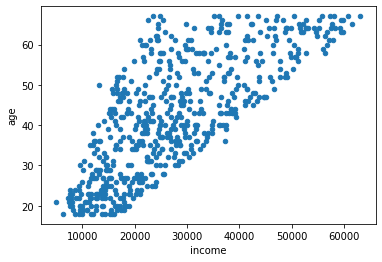

In [67]:
bank_data.plot(x = "income", y = "age", kind = "scatter")

There is a strong correlation between 'Income' and 'Age'.

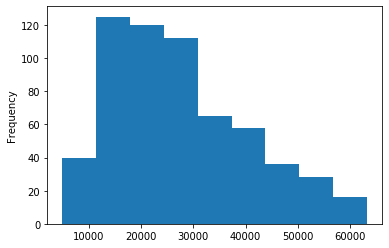

In [68]:
#Histogram for Income
bank_data["income"].plot(kind = "hist", bins = 9)

The histogram shows that there is a right skew for the income data.

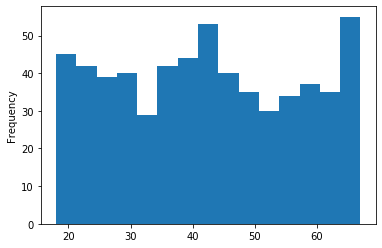

In [69]:
#Histogram for Age
bank_data["age"].plot(kind = "hist", bins = 15)

There is an even distribution across all ages. The data is not normally distributed.

# Question 10: Cross-Tabulation

In [75]:
gg = pd.crosstab(bank_data["region"], bank_data["pep"])
gg

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


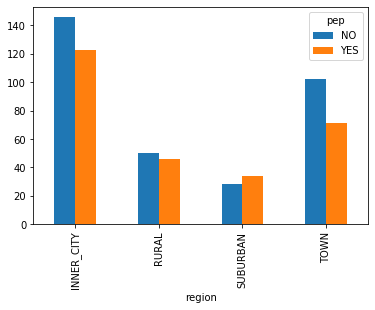

In [76]:
plt.show(gg.plot(kind = "bar"))

# Question 11: Missing Values

In [175]:
bank_miss = pd.read_csv("bank_data_missing_vals.csv")
bank_miss.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,?,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [176]:
#Changing out the special characters to Null Values
bm2 = bank_miss.replace("?",np.nan)
bm2.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,NaN,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [177]:
#Shows all the columns with the null values
bm2.describe(include = "all")

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,590,587,600.000000,590,591,600,600,600,600,600,600
unique,600,50,586,NaN,2,4,2,2,2,2,2,2
top,ID12426,64,38248.3,NaN,MALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,1,19,2,NaN,296,266,396,304,414,455,391,326
mean,NaN,NaN,NaN,1.011667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.056752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
#Total Null Values for each attribute
bm2.isnull().sum()

id               0
age             10
income          13
children         0
gender          10
region           9
married          0
car              0
savings_acct     0
current_acct     0
mortgage         0
pep              0
dtype: int64

In [190]:
a = bm2[bm2["age"].notnull()]
age_mean = a['age'].astype(int).mean()
bm2["age"] = bm2["age"].fillna(age_mean)

bm2['age'].isnull().sum()

0

In [197]:
#for loop to go through income and children attributes
lst = ["income","children"]
for i in lst:
    f = bm2[bm2[i].notnull()]
    new_mean = f[i].astype(float).mean()
    bm2[i] = bm2[i].fillna(new_mean)
    print(bm2[i].isnull().sum())


0
0


In [209]:
#Dropping all the na's from the categorical variable
bm2.shape

(600, 12)

In [211]:
bm2.dropna(axis = 0, inplace= True)
bm2.shape

(581, 12)

In [212]:
#No more null values
bm2.isnull().sum()

id              0
age             0
income          0
children        0
gender          0
region          0
married         0
car             0
savings_acct    0
current_acct    0
mortgage        0
pep             0
dtype: int64